### Natural Language Processing exercises

#### Part I

Import the `nltk.corpus` submodule, download the Project Gutenberg. Find a document other than `carroll-alice.txt`. Read in that document. Do the following: 
* Splits the document into sentences, take out the first 20 sentences, print out the first 20 sentences
* Splits the first 20 sentences into words
* Standardizing Text:
    * Lowercasing the first 20 sentences
    * Remove prefixes and suffixes from words through lemmatization
    * Remove tokens that don't contribute meaning
    * Plot the frequency distribution for tokens

In [1]:
import nltk.corpus
import pandas as pd
# Download books from Project Gutenberg
nltk.download("gutenberg")
# List the documents in a corpus
nltk.corpus.gutenberg.fileids() 

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/wenzhuowu/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
# I will use the first document
emma = nltk.corpus.gutenberg.raw("austen-emma.txt")

In [3]:
# print out the first 20 sentences
sentence = nltk.sent_tokenize(emma)[0:20]

In [4]:
# We should remove /n in the sentence first
# rename a list rex, to replace "\n" with empty space
clean_sens = []
for x in sentence:
    clean_sens.append(x.replace("\n", " "))
clean_sens

['[Emma by Jane Austen 1816]  VOLUME I  CHAPTER I   Emma Woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence; and had lived nearly twenty-one years in the world with very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate, indulgent father; and had, in consequence of her sister's marriage, been mistress of his house from a very early period.",
 'Her mother had died too long ago for her to have more than an indistinct remembrance of her caresses; and her place had been supplied by an excellent woman as governess, who had fallen little short of a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family, less as a governess than a friend, very fond of both daughters, but particularly of Emma.",
 'Between _them_ it was more the intimacy of sisters.',
 "Even before Miss Taylor had ceased to hold the nominal office of governes

In [5]:
# Splits the first 20 sentences into words
words = nltk.corpus.gutenberg.sents("austen-emma.txt")[0:23]
words

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.'],
 ['Her',
  'mother',
  'h

In [6]:
# Standardizing Text:
# Lowercasing the first 20 sentences
# We can't lowercase the result right above, because AttributeError: 'list' object has no attribute 'lower'.
words = nltk.sent_tokenize(emma)[0:20]
lower = [w.lower() for w in clean_sens]
lower

['[emma by jane austen 1816]  volume i  chapter i   emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence; and had lived nearly twenty-one years in the world with very little to distress or vex her.',
 "she was the youngest of the two daughters of a most affectionate, indulgent father; and had, in consequence of her sister's marriage, been mistress of his house from a very early period.",
 'her mother had died too long ago for her to have more than an indistinct remembrance of her caresses; and her place had been supplied by an excellent woman as governess, who had fallen little short of a mother in affection.',
 "sixteen years had miss taylor been in mr. woodhouse's family, less as a governess than a friend, very fond of both daughters, but particularly of emma.",
 'between _them_ it was more the intimacy of sisters.',
 "even before miss taylor had ceased to hold the nominal office of governes

In [7]:
# Remove prefixes and suffixes from words through lemmatization
stemmer = nltk.PorterStemmer()
words_1 = [stemmer.stem(w) for w in lower]
words_1

['[emma by jane austen 1816]  volume i  chapter i   emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence; and had lived nearly twenty-one years in the world with very little to distress or vex her.',
 "she was the youngest of the two daughters of a most affectionate, indulgent father; and had, in consequence of her sister's marriage, been mistress of his house from a very early period.",
 'her mother had died too long ago for her to have more than an indistinct remembrance of her caresses; and her place had been supplied by an excellent woman as governess, who had fallen little short of a mother in affection.',
 "sixteen years had miss taylor been in mr. woodhouse's family, less as a governess than a friend, very fond of both daughters, but particularly of emma.",
 'between _them_ it was more the intimacy of sisters.',
 "even before miss taylor had ceased to hold the nominal office of governes

In [8]:
# Remove tokens that don't contribute meaning
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("english")
words_2= [w for w in words_1 if w not in stopwords]
words_2

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wenzhuowu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['[emma by jane austen 1816]  volume i  chapter i   emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence; and had lived nearly twenty-one years in the world with very little to distress or vex her.',
 "she was the youngest of the two daughters of a most affectionate, indulgent father; and had, in consequence of her sister's marriage, been mistress of his house from a very early period.",
 'her mother had died too long ago for her to have more than an indistinct remembrance of her caresses; and her place had been supplied by an excellent woman as governess, who had fallen little short of a mother in affection.',
 "sixteen years had miss taylor been in mr. woodhouse's family, less as a governess than a friend, very fond of both daughters, but particularly of emma.",
 'between _them_ it was more the intimacy of sisters.',
 "even before miss taylor had ceased to hold the nominal office of governes

In [9]:
# A list cannot be tokenized
# we have to convert words_2 (a list) to string
def listToString(s): 
    # initialize an empty string
    str1 = " " 
    # return string  
    return (str1.join(s))
            
words_3= listToString(words_2)
words_3
# type(words_3)
words = nltk.word_tokenize(words_3) #tokenize words_3
words

['[',
 'emma',
 'by',
 'jane',
 'austen',
 '1816',
 ']',
 'volume',
 'i',
 'chapter',
 'i',
 'emma',
 'woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistin

In [10]:
# Plot the frequency distribution for tokens
fq = nltk.FreqDist(w for w in words if w.isalnum()) #remove non-alphanumeric
fq

FreqDist({'of': 33, 'the': 30, 'and': 26, 'her': 24, 'a': 20, 'had': 19, 'to': 15, 'was': 15, 'in': 13, 'she': 13, ...})

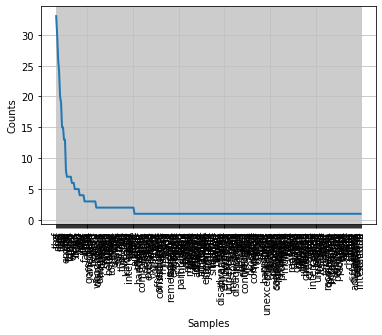

In [11]:
%matplotlib inline
fq.plot()

#### Part II

Take out three sentences from the document you choose in Part I (note: you can choose any sentences, but they need to be complete sentences). Do the following: 
1. compute the word frequencies for this small corpus using the scikit-learn package; convert the output to a data frame and add column names as their features names
2. do the same as in 1. using one-hot encoding
3. calculate the tf-idf (use `sublinear_tf = True`)
4. measure the cosine similarity between the three sentences 
5. calculate the tf-idf using the bi-gram model and then measure the cosine similarity between the three sentences 

***1. compute the word frequencies for this small corpus using the scikit-learn package; convert the output to a data frame and add column names as their features names***

In [17]:
#select the second to forth sentence in emma
t= nltk.sent_tokenize(words_3)[12:15]
print(t)
# We should remove /n in the sentence first
# rename a list rex, to replace "\n" with empty space
rez = []
for x in t:
    rez.append(x.replace("\n", " "))
rez

['her father composed himself to sleep after dinner, as usual, and she had then only to sit and think of what she had lost.', 'the event had every promise of happiness for her friend.', "mr. weston was a man of unexceptionable character, easy fortune, suitable age, and pleasant manners; and there was some satisfaction in considering with what self-denying, generous friendship she had always wished and promoted the match; but it was a black morning's work for her."]


['her father composed himself to sleep after dinner, as usual, and she had then only to sit and think of what she had lost.',
 'the event had every promise of happiness for her friend.',
 "mr. weston was a man of unexceptionable character, easy fortune, suitable age, and pleasant manners; and there was some satisfaction in considering with what self-denying, generous friendship she had always wished and promoted the match; but it was a black morning's work for her."]

In [18]:
# Import module
from sklearn.feature_extraction.text import CountVectorizer
# Remove the stop_words
vec = CountVectorizer(tokenizer = nltk.word_tokenize, stop_words= ['the','.',',',';'])
freq = vec.fit_transform(rez)
freq

<3x58 sparse matrix of type '<class 'numpy.int64'>'
	with 68 stored elements in Compressed Sparse Row format>

In [19]:
#.todense() convert sparse matrix to a dense matrix
# Don't do this for a really large matrix
matrix1_data = freq.todense()
df = pd.DataFrame(matrix1_data)

In [20]:
# Get which term each column corresponds to
col= vec.get_feature_names()
# change the colomn name
df.columns = col
df

,'s,a,after,age,always,and,as,black,but,character,...,think,to,unexceptionable,usual,was,weston,what,wished,with,work
0,0,0,1,0,0,2,1,0,0,0,...,1,2,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0,1,1,3,0,1,1,1,...,0,0,1,0,3,1,1,1,1,1


In [21]:
# change the row name
df.index
df.rename({0: "sentence_1", 1: "sentence_2", 2: "sentence_3"}, axis='index')

,'s,a,after,age,always,and,as,black,but,character,...,think,to,unexceptionable,usual,was,weston,what,wished,with,work
sentence_1,0,0,1,0,0,2,1,0,0,0,...,1,2,0,1,0,0,1,0,0,0
sentence_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence_3,1,2,0,1,1,3,0,1,1,1,...,0,0,1,0,3,1,1,1,1,1


***2. do the same as in 1. using one-hot encoding***

In [22]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()
ohot = binarizer.fit_transform(freq)
ohot.todense()

matrix([[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
         0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
         1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
         0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
         1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
         0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]])

In [23]:
matrix2_data = freq.todense()
df2 = pd.DataFrame(matrix2_data)
df2.columns = col
df2.rename({0: "sentence_1", 1: "sentence_2", 2: "sentence_3"}, axis='index')

,'s,a,after,age,always,and,as,black,but,character,...,think,to,unexceptionable,usual,was,weston,what,wished,with,work
sentence_1,0,0,1,0,0,2,1,0,0,0,...,1,2,0,1,0,0,1,0,0,0
sentence_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence_3,1,2,0,1,1,3,0,1,1,1,...,0,0,1,0,3,1,1,1,1,1


***3. calculate the tf-idf (use sublinear_tf = True)***

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer = nltk.word_tokenize, sublinear_tf = True)
tfidf = vec.fit_transform(rez)

In [25]:
tfidf.todense()

matrix([[0.        , 0.26582087, 0.12192302, 0.        , 0.        ,
         0.20643362, 0.        , 0.        , 0.26582087, 0.20643362,
         0.        , 0.        , 0.        , 0.20643362, 0.        ,
         0.20643362, 0.        , 0.        , 0.        , 0.20643362,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.20643362, 0.        , 0.12192302, 0.20643362, 0.        ,
         0.        , 0.20643362, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.12192302, 0.20643362, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.26582087,
         0.20643362, 0.20643362, 0.        , 0.        , 0.        ,
         0.20643362, 0.        , 0.20643362, 0.3495225 , 0.        ,
         0.20643362, 0.        , 0.        , 0.15699809, 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.2149172 , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,


In [26]:
vec.get_feature_names()

["'s",
 ',',
 '.',
 ';',
 'a',
 'after',
 'age',
 'always',
 'and',
 'as',
 'black',
 'but',
 'character',
 'composed',
 'considering',
 'dinner',
 'easy',
 'event',
 'every',
 'father',
 'for',
 'fortune',
 'friend',
 'friendship',
 'generous',
 'had',
 'happiness',
 'her',
 'himself',
 'in',
 'it',
 'lost',
 'man',
 'manners',
 'match',
 'morning',
 'mr.',
 'of',
 'only',
 'pleasant',
 'promise',
 'promoted',
 'satisfaction',
 'self-denying',
 'she',
 'sit',
 'sleep',
 'some',
 'suitable',
 'the',
 'then',
 'there',
 'think',
 'to',
 'unexceptionable',
 'usual',
 'was',
 'weston',
 'what',
 'wished',
 'with',
 'work']

***4. measure the cosine similarity between the three sentences***

In [27]:
matrix3_data = (tfidf @ tfidf.T).todense()
df3 = pd.DataFrame(matrix3_data)
df4= df3.set_axis(['sentence_1', 'sentence_2', 'sentence_3'], axis=1, inplace=False)
df4.rename({0: "sentence_1", 1: "sentence_2", 2: "sentence_3"}, axis='index')

,sentence_1,sentence_2,sentence_3
sentence_1,1.000000,0.122976,0.222190
sentence_2,0.122976,1.000000,0.131747
sentence_3,0.222190,0.131747,1.000000


***5. calculate the tf-idf using the bi-gram model and then measure the cosine similarity between the three sentences***

In [28]:
words = [nltk.word_tokenize(doc) for doc in rez]
list(nltk.ngrams(words[0],2))
# list(nltk.ngrams(words[1],2))
# list(nltk.ngrams(words[2],2))

[('her', 'father'),
 ('father', 'composed'),
 ('composed', 'himself'),
 ('himself', 'to'),
 ('to', 'sleep'),
 ('sleep', 'after'),
 ('after', 'dinner'),
 ('dinner', ','),
 (',', 'as'),
 ('as', 'usual'),
 ('usual', ','),
 (',', 'and'),
 ('and', 'she'),
 ('she', 'had'),
 ('had', 'then'),
 ('then', 'only'),
 ('only', 'to'),
 ('to', 'sit'),
 ('sit', 'and'),
 ('and', 'think'),
 ('think', 'of'),
 ('of', 'what'),
 ('what', 'she'),
 ('she', 'had'),
 ('had', 'lost'),
 ('lost', '.')]

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
words = [nltk.word_tokenize(d.lower()) for d in rez]
vectorizer = TfidfVectorizer(tokenizer = nltk.bigrams, lowercase = False)
tfidf = vectorizer.fit_transform(words)
tfidf.todense()

matrix([[0.        , 0.14946213, 0.19652474, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.19652474, 0.        , 0.        , 0.        , 0.        ,
         0.19652474, 0.        , 0.19652474, 0.19652474, 0.        ,
         0.        , 0.        , 0.19652474, 0.        , 0.19652474,
         0.        , 0.        , 0.        , 0.19652474, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.19652474, 0.19652474, 0.        , 0.        ,
         0.19652474, 0.        , 0.19652474, 0.        , 0.        ,
         0.19652474, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.19652474, 0.19652474,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.29892426, 0.19652474, 0.19652474, 0.        , 0.        ,
         0.        , 0.        , 0.19652474, 0.        , 0.19652474,
         0.19652474, 0.19652474, 0

In [31]:
(tfidf @ tfidf.T).todense()

matrix([[1.        , 0.        , 0.04741036],
        [0.        , 1.        , 0.02598294],
        [0.04741036, 0.02598294, 1.        ]])

In [32]:
matrix3_data = (tfidf @ tfidf.T).todense()
df3 = pd.DataFrame(matrix3_data)
df4= df3.set_axis(['sentence_1', 'sentence_2', 'sentence_3'], axis=1, inplace=False)
df4.rename({0: "sentence_1", 1: "sentence_2", 2: "sentence_3"}, axis='index')

,sentence_1,sentence_2,sentence_3
sentence_1,1.00000,0.000000,0.047410
sentence_2,0.00000,1.000000,0.025983
sentence_3,0.04741,0.025983,1.000000
